In [1]:
# Import necessary libraries
import json
import pandas as pd
import nltk
import random
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import matplotlib.pyplot as plt


In [2]:
# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/WilliamNzoiwu1/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/WilliamNzoiwu1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
# Initialize the WordNet lemmatizer
lemmatizer = WordNetLemmatizer()

In [4]:
with open('intents.json', 'r') as f:
    intents_data = json.load(f)['intents']
    
intents_dict = {intent['tag']: intent for intent in intents_data}

# Load the statistical dataset
stats_df = pd.read_csv('mental_health_data.csv')

In [5]:
stats_df.head(3)

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2018,2018,NV,Nevada,BRFSS,Mental Health,At least 14 recent mentally unhealthy days amo...,%,Crude Prevalence,21.6,...,26.8,Overall,Overall,POINT (-117.07184056399967 39.493240390000494),32,MTH,MTH2_0,CRDPREV,OVERALL,OVR
1,2020,2020,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,...,5.8,Race/Ethnicity,"Black, non-Hispanic",POINT (-117.07184056399967 39.493240390000494),32,MTH,MTH1_0,MEAN,RACE,BLK
2,2018,2018,NV,Nevada,BRFSS,Mental Health,Recent mentally unhealthy days among adults ag...,Number,Mean,5.0,...,5.6,Gender,Female,POINT (-117.07184056399967 39.493240390000494),32,MTH,MTH1_0,MEAN,GENDER,GENF


In [6]:
# Clean the DatatFrame by dropping unnecessary rows and columns
stats_df = stats_df.drop(columns = ["YearEnd", "Topic", "DataValueAlt", "DataSource", "DatavalueFootnote",
                                    "LocationID", "TopicID", "QuestionID", "DataValueTypeID",
                                   "StratificationCategoryID1", "StratificationID1"])
stats_df = stats_df.rename(columns = {"YearStart": "Year", "LocationAbbr": "StateAbbr", "LocationDesc": "State"})
stats_df = stats_df.dropna()

In [7]:
stats_df.head(3)

,Year,StateAbbr,State,Question,DataValueUnit,DataValueType,DataValue,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
0,2018,NV,Nevada,At least 14 recent mentally unhealthy days amo...,%,Crude Prevalence,21.6,17.2,26.8,Overall,Overall,POINT (-117.07184056399967 39.493240390000494)
1,2020,NV,Nevada,Recent mentally unhealthy days among adults ag...,Number,Mean,4.1,2.4,5.8,Race/Ethnicity,"Black, non-Hispanic",POINT (-117.07184056399967 39.493240390000494)
2,2018,NV,Nevada,Recent mentally unhealthy days among adults ag...,Number,Mean,5.0,4.4,5.6,Gender,Female,POINT (-117.07184056399967 39.493240390000494)


In [8]:
texas_df = stats_df[stats_df['State'] == 'Texas']
texas_df.head(3)

,Year,StateAbbr,State,Question,DataValueUnit,DataValueType,DataValue,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation
178,2021,TX,Texas,Recent mentally unhealthy days among adults ag...,Number,Mean,5.1,4.7,5.5,Gender,Female,POINT (-99.42677020599967 31.827240407000488)
184,2017,TX,Texas,Recent mentally unhealthy days among adults ag...,Number,Mean,3.7,3.1,4.2,Race/Ethnicity,Hispanic,POINT (-99.42677020599967 31.827240407000488)
10015,2018,TX,Texas,Recent mentally unhealthy days among adults ag...,Number,Mean,3.8,3.5,4.1,Overall,Overall,POINT (-99.42677020599967 31.827240407000488)


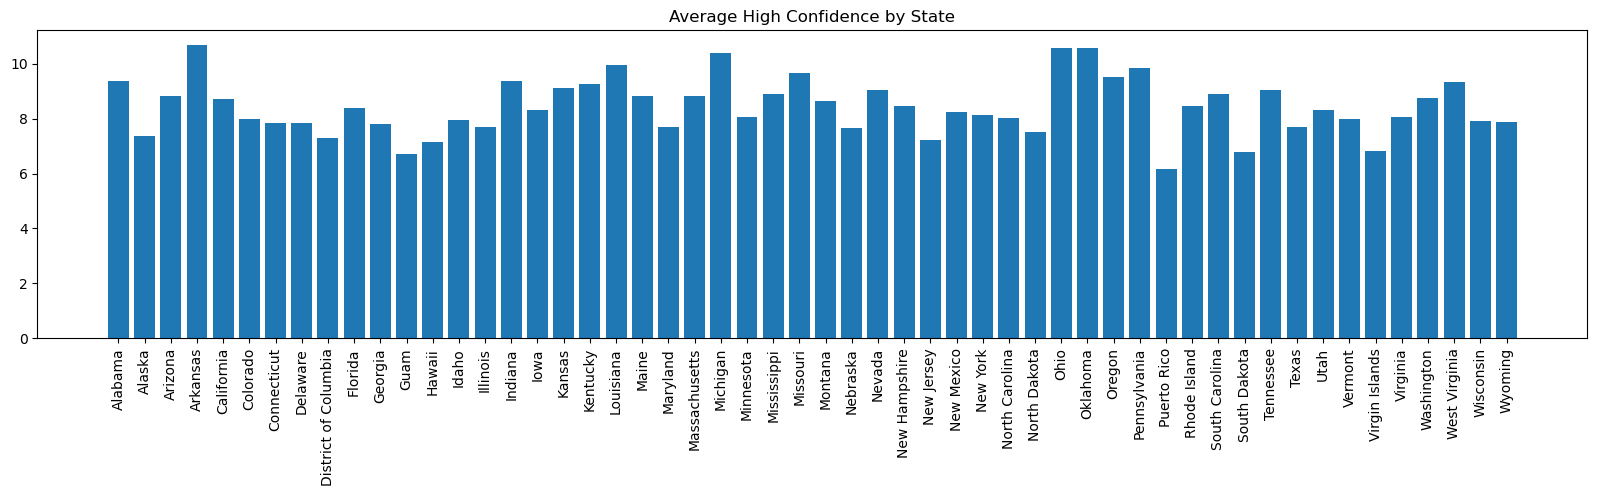

In [9]:
# Calculate the average HighConfidenceLimit for each state
average_confidence = stats_df.groupby("State")["HighConfidenceLimit"].mean()

# Get the states from the index of the groupby result
states = average_confidence.index

# Plot the data
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.bar(states, average_confidence)
plt.title("Average High Confidence by State")
plt.show()

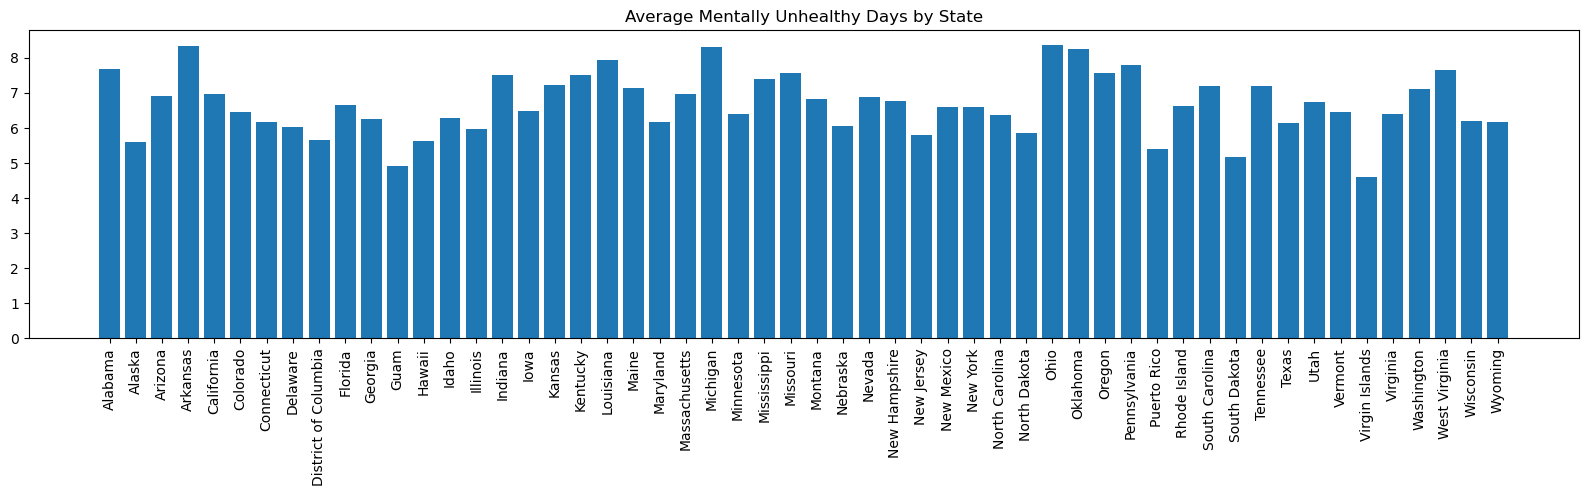

In [10]:
# Calculate the average mentally unhealthy days for each state
avg_bad_days = stats_df.groupby("State")["DataValue"].mean()

# Get the states from the index of the groupby result
states = avg_bad_days.index

# Plot the data
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.bar(states, avg_bad_days)
plt.title("Average Mentally Unhealthy Days by State")
plt.show()

In [11]:
#Filter unhealthy days by race
question = stats_df[stats_df['Question'] == 'Recent mentally unhealthy days among adults aged >= 18 years']
race = question[question['StratificationCategory1'] == 'Race/Ethnicity']
race_df = race[['Year', 'State', 'Question', 'DataValueType', 'DataValue', 'Stratification1']]
race_df = race_df.rename(columns = {"Stratification1": "Race/Ethnicity"})
race_df = race_df.sort_values(by=['State', 'Year', 'Race/Ethnicity'])

In [12]:
race_df = race_df[race_df['DataValueType'] == 'Mean']
race_df = race_df.reset_index(drop=True)
race_df.head()

,Year,State,Question,DataValueType,DataValue,Race/Ethnicity
0,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.0,"Black, non-Hispanic"
1,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.6,Hispanic
2,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.7,"Other, non-Hispanic"
3,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,4.6,"White, non-Hispanic"
4,2013,Alabama,Recent mentally unhealthy days among adults ag...,Mean,4.4,"Black, non-Hispanic"


In [13]:
#Filter unhealthy days by gender
question = stats_df[stats_df['Question'] == 'Recent mentally unhealthy days among adults aged >= 18 years']
gender = question[question['StratificationCategory1'] == 'Gender']
gender_df = gender[['Year', 'State', 'Question', 'DataValueType', 'DataValue', 'Stratification1']]
gender_df = gender_df.rename(columns = {"Stratification1": "Gender"})
gender_df = gender_df.sort_values(by=['State', 'Year', 'Gender'])

In [14]:
gender_df = gender_df[gender_df['DataValueType'] == 'Mean']
gender_df = gender_df.reset_index(drop=True)
gender_df

,Year,State,Question,DataValueType,DataValue,Gender
0,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.5,Female
1,2011,Alabama,Recent mentally unhealthy days among adults ag...,Mean,4.1,Male
2,2012,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.9,Female
3,2012,Alabama,Recent mentally unhealthy days among adults ag...,Mean,4.4,Male
4,2013,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.3,Female
...,...,...,...,...,...,...
1161,2019,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,3.3,Male
1162,2020,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,4.9,Female
1163,2020,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,3.0,Male
1164,2021,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,5.7,Female


In [15]:
# Export to CSV File
gender_df.to_csv("gender.csv", index = False)

In [16]:
# Filter average number of unhealthy days by gender in 2020
year_2020_df = gender_df[gender_df['Year'] == 2020]
year_2020_df.head(10)

,Year,State,Question,DataValueType,DataValue,Gender
18,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.9,Female
19,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,3.8,Male
40,2020,Alaska,Recent mentally unhealthy days among adults ag...,Mean,4.4,Female
41,2020,Alaska,Recent mentally unhealthy days among adults ag...,Mean,2.4,Male
62,2020,Arizona,Recent mentally unhealthy days among adults ag...,Mean,4.9,Female
63,2020,Arizona,Recent mentally unhealthy days among adults ag...,Mean,3.5,Male
84,2020,Arkansas,Recent mentally unhealthy days among adults ag...,Mean,6.3,Female
85,2020,Arkansas,Recent mentally unhealthy days among adults ag...,Mean,4.1,Male
106,2020,California,Recent mentally unhealthy days among adults ag...,Mean,4.5,Female
107,2020,California,Recent mentally unhealthy days among adults ag...,Mean,3.6,Male


In [17]:
# Filter average number of unhealthy days by gender in 2020
race_2020_df = race_df[race_df['Year'] == 2020]
race_2020_df

,Year,State,Question,DataValueType,DataValue,Race/Ethnicity
35,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.3,"Black, non-Hispanic"
36,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.0,Hispanic
37,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.1,"Multiracial, non-Hispanic"
38,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,5.8,"Other, non-Hispanic"
39,2020,Alabama,Recent mentally unhealthy days among adults ag...,Mean,4.7,"White, non-Hispanic"
...,...,...,...,...,...,...
2306,2020,Wisconsin,Recent mentally unhealthy days among adults ag...,Mean,4.0,"White, non-Hispanic"
2337,2020,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,5.1,Hispanic
2338,2020,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,7.6,"Multiracial, non-Hispanic"
2339,2020,Wyoming,Recent mentally unhealthy days among adults ag...,Mean,5.9,"Other, non-Hispanic"


In [18]:
# Filter average number of unhealthy days by gender in Texas
texas_gender_df = gender_df[gender_df['State'] == 'Texas']
texas_gender_df.head(10)

,Year,State,Question,DataValueType,DataValue,Gender
986,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,4.2,Female
987,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.9,Male
988,2012,Texas,Recent mentally unhealthy days among adults ag...,Mean,4.1,Female
989,2012,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.2,Male
990,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.9,Female
991,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.5,Male
992,2014,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.5,Female
993,2014,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.5,Male
994,2015,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.6,Female
995,2015,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.8,Male


In [19]:
# Filter average number of unhealthy days by race in Texas
texas_race_df = race_df[race_df['State'] == 'Texas']
texas_race_df.head(10)

,Year,State,Question,DataValueType,DataValue,Race/Ethnicity
1991,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.9,"Black, non-Hispanic"
1992,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.6,Hispanic
1993,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,8.0,"Multiracial, non-Hispanic"
1994,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.7,"Other, non-Hispanic"
1995,2011,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.5,"White, non-Hispanic"
1996,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,4.3,"Black, non-Hispanic"
1997,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.0,Hispanic
1998,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,5.1,"Multiracial, non-Hispanic"
1999,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,2.6,"Other, non-Hispanic"
2000,2013,Texas,Recent mentally unhealthy days among adults ag...,Mean,3.0,"White, non-Hispanic"


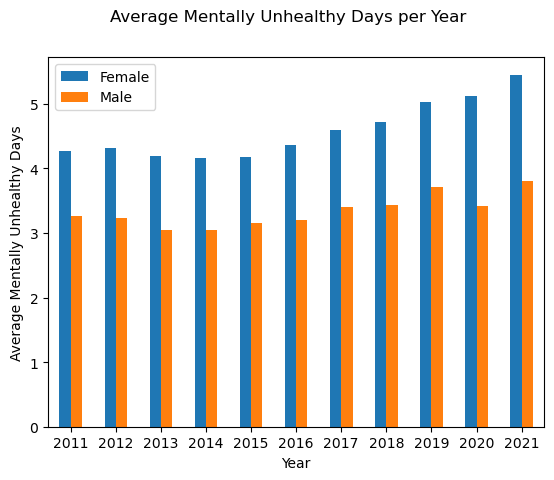

In [20]:
#Display average number of mentally unhealthy days by gender
# Filter df to only needed columns
filtered_gender_df = gender_df[['Year', 'DataValue', 'Gender']]

# Groupby year and gender, aggregate mean DataValue
grouped = filtered_gender_df.groupby(['Year', 'Gender'])['DataValue'].mean().unstack()

# Plot bars 
fig, ax = plt.subplots()
grouped.plot(kind='bar', ax=ax, rot=0) 

ax.set_xlabel("Year")
ax.set_ylabel("Average Mentally Unhealthy Days")
ax.legend(["Female", "Male"]);

fig.suptitle("Average Mentally Unhealthy Days per Year");

plt.show()

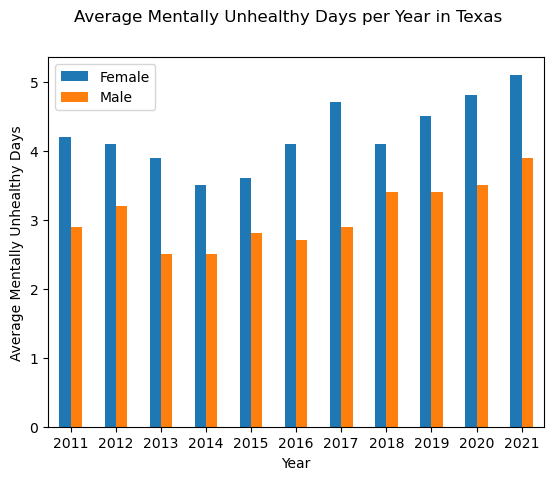

In [21]:
#Display average number of mentally unhealthy days by gender in Texas
# Filter df to only needed columns
filtered_tx_df = texas_gender_df[['Year', 'DataValue', 'Gender']]

# Groupby year and gender, aggregate mean DataValue
grouped = filtered_tx_df.groupby(['Year', 'Gender'])['DataValue'].mean().unstack()

# Plot bars 
fig, ax = plt.subplots()
grouped.plot(kind='bar', ax=ax, rot=0) 

ax.set_xlabel("Year")
ax.set_ylabel("Average Mentally Unhealthy Days")
ax.legend(["Female", "Male"]);

fig.suptitle("Average Mentally Unhealthy Days per Year in Texas"); 

plt.show()

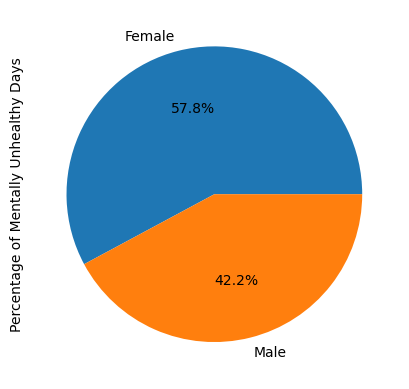

In [22]:
# Generate a pie plot showing the distribution of unhealthy days by gender
gender = gender_df.groupby('Gender')['DataValue'].mean()
gender.plot(kind = "pie", autopct = "%1.1f%%", ylabel = "Percentage of Mentally Unhealthy Days")
plt.show()

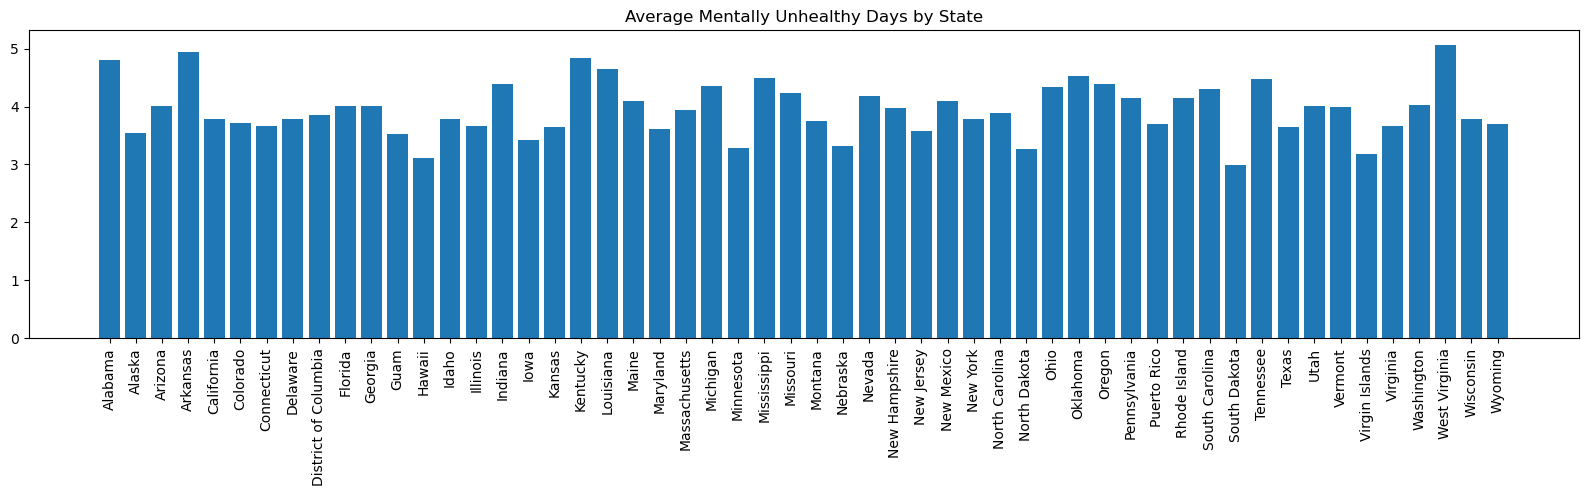

In [23]:
# Calculate the average mentally unhealthy days for each state
avg_bad_days2 = gender_df.groupby("State")["DataValue"].mean()

# Get the states from the index of the groupby result
states = avg_bad_days2.index

# Plot the data
plt.figure(figsize=(20,4))
plt.xticks(rotation=90)
plt.bar(states, avg_bad_days2)
plt.title("Average Mentally Unhealthy Days by State")
plt.show()

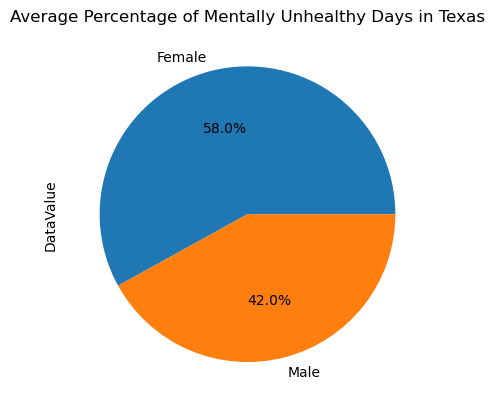

In [24]:
# Generate a pie plot showing the distribution of unhealthy days by gender in Texas
tx_gender = texas_gender_df.groupby('Gender')['DataValue'].mean()
tx_gender.plot(kind = "pie", autopct = "%1.1f%%", title = "Average Percentage of Mentally Unhealthy Days in Texas")
plt.show()

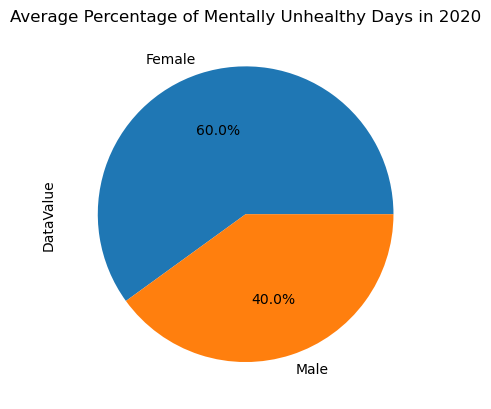

In [25]:
gender = year_2020_df.groupby('Gender')['DataValue'].mean()
gender.plot(kind = "pie", autopct = "%1.1f%%", title = "Average Percentage of Mentally Unhealthy Days in 2020")
plt.show()

In [26]:
# Preprocess the intents data
intents_df = pd.DataFrame(intents_data)
dic = {"tag":[], "patterns":[], "responses":[]}
for i in range(len(intents_df)):
    ptrns = intents_df[intents_df.index == i]['patterns'].values[0]
    rspns = intents_df[intents_df.index == i]['responses'].values[0]
    tag = intents_df[intents_df.index == i]['tag'].values[0]
    for j in range(len(ptrns)):
        dic['tag'].append(tag)
        dic['patterns'].append(ptrns[j])
        dic['responses'].append(rspns)

intents_df = pd.DataFrame.from_dict(dic)

In [27]:
# Preprocess the patterns
intents_df['patterns'] = intents_df['patterns'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split() if word not in set(stopwords.words('english'))]))

In [28]:
# Split the data into training and testing sets
X = intents_df['patterns']
y = intents_df['tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [30]:
# Train a Random Forest classifier
model = RandomForestClassifier()
model.fit(X_train_vec, y_train)

RandomForestClassifier()

In [31]:
# Predict intents for the testing set
y_pred = model.predict(X_test_vec)

In [32]:
states = ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

In [ ]:
def chat():
    print("Start chatting with the bot (type 'quit' to stop)!")
    while True:
        inp = input("You: ")
        if inp.lower() == "quit":
            break

        # Vectorize the user's input
        inp_vec = vectorizer.transform([inp])

        # Predict the intent
        pred = model.predict(inp_vec)

        # Generate a response
        if pred[0] == 'stats':
            state = next((state for state in stats_df['state'] if state in inp), None)
            if state is not None:
                statistic = stats_df[stats_df['state'] == state]['statistic'].values[0]
                response = f"The mental health statistic for {state} is {statistic}."
            else:
                response = "I'm sorry, but I couldn't find a state in your message. Could you please specify the state you're interested in?"
        else:
            intent_responses = intents_dict.get(pred[0], {}).get('responses', [])
            if intent_responses:
                response = random.choice(intent_responses)
            else:
                response = "Hello! How can I assist you today?"

        print(f"Bot: {response}")

# Call the chat function to start a conversation
chat()


Start chatting with the bot (type 'quit' to stop)!


In [ ]:
# Calculate accuracy
correct_predictions = sum(y_test == y_pred)
total_predictions = len(y_test)
accuracy = correct_predictions / total_predictions

print(f"Accuracy: {accuracy * 100}%")

